# **Mini Project 1**

0. Requirements:
   
   If you do not have the following packages installed, run the command below to install them.

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install codecarbon
!pip install shap

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 21.4 MB/s eta 0:00:00


1. Data Preparation:
   
    Goal: Load and inspect the IMDb dataset containing movie reviews labeled with positive and negative sentiments.(https://ai.stanford.edu/%7Eamaas/data/sentiment/)
    
    Task: Read the dataset, store the reviews and their associated sentiments, and explore the dataset to understand its structure.

In [5]:
import os
import pandas as pd
import numpy as np
import re
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from codecarbon import EmissionsTracker

# TASK 1: Data Preparation 
# Load the dataset from the local aclImdb folder

# Specify the path to the train folder in the aclImdb dataset

# Inspect the dataset
#######################################################################

# Définir le chemin absolu vers le dataset
dataset_path = r"C:\Users\Abdel\Desktop\cours_1092_H24\Mini-projet 1\aclImdb_v1\aclImdb"

# Chargement des fichiers de critiques
def load_imdb_data(dataset_path):
    data = {"review": [], "sentiment": []}
    for sentiment in ["pos", "neg"]:
        path = os.path.join(dataset_path, "train", sentiment)
        for file in os.listdir(path):
            with open(os.path.join(path, file), "r", encoding="utf-8") as f:
                data["review"].append(f.read())
                data["sentiment"].append(1 if sentiment == "pos" else 0)
    return pd.DataFrame(data)

df = load_imdb_data(dataset_path)

# Aperçu des données
print(df.head())

# Vérifier l'équilibre des classes
print(df["sentiment"].value_counts())



                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1
sentiment
1    12500
0    12500
Name: count, dtype: int64


2. Text Preprocessing:
   
    Goal: Clean and preprocess the text data to remove noise and prepare it for analysis.
    
    Task: Remove unnecessary characters (e.g., HTML tags, punctuation), convert text to lowercase, and process words by removing stop words and stemming/lemmatizing them.

In [6]:
# TASK 2: Text Preprocessing 
# Remove HTML tags

# Remove special characters

# Convert to lowercase
 

###################
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Fonction de nettoyage
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)  # Supprimer HTML
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Supprimer caractères spéciaux
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

# Appliquer le prétraitement
df["cleaned_review"] = df["review"].apply(clean_text)

# Aperçu après nettoyage
print(df["cleaned_review"].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


0    bromwel high cartoon comedi ran time program s...
1    homeless houseless georg carlin state issu yea...
2    brilliant act lesley ann warren best dramat ho...
3    easili underr film inn brook cannon sure flaw ...
4    typic mel brook film much less slapstick movi ...
Name: cleaned_review, dtype: object


3. Feature Extraction:

    Goal: Transform the cleaned text into numerical features for machine learning.
   
    Task: Use a vectorization technique such as TF-IDF to convert the text into a numerical matrix that captures the importance of each word in the dataset.

In [7]:
# TASK 3: Feature Extraction 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)  # Garder 5000 mots les plus fréquents
X = vectorizer.fit_transform(df["cleaned_review"])
y = df["sentiment"]

# Vérifier la forme de la matrice
print(X.shape)


(25000, 5000)


4. Model Training:

    Goal: Train a machine learning model to classify reviews based on their sentiment.
    
    Task: Split the dataset into training and testing sets, train a Logistic Regression model, and evaluate its performance on the test data.

In [8]:
# TASK 4: Model Training 

# TASK 8: Track emissions during model training

####################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)


5. Model Evaluation:

    Goal: Assess the performance of your model using appropriate metrics.
    
    Task: Evaluate precision, recall, and F1-score of the Logistic Regression model. Use these metrics to identify the strengths and weaknesses of your system. Visualize the Confusion Matrix to better understand how well the model classifies positive and negative reviews. Additionally, test the model with a new review, preprocess it, make a prediction, and display the result. Example: test it with a new review such as:
    "The movie had great visuals, but the storyline was dull and predictable." The expected output might be: Negative Sentiment.

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2485
           1       0.88      0.90      0.89      2515

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



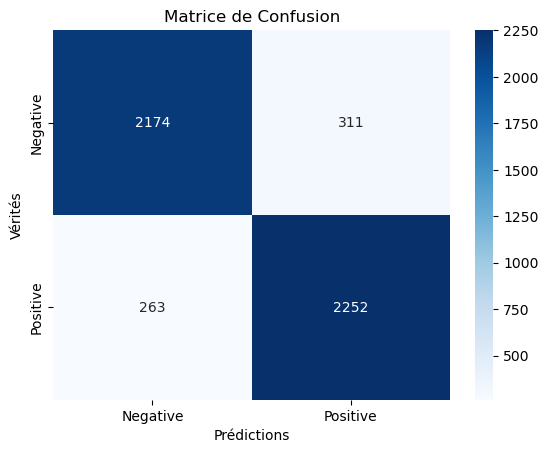

In [9]:
# TASK 5: Model Evaluation 

# Classification Report

# Confusion Matrix

# Plot the Confusion Matrix


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage des performances
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion")
plt.show()


# Test with a new review
review = "The movie had great visuals but the storyline was dull and predictable."


6. Hyperparameter Tuning:

    Goal: Optimize your Logistic Regression model by tuning its hyperparameters.
   
    Task: Use an optimization method to find the best parameters for your model and improve its accuracy.

In [10]:
# TASK 6: Hyperparameter Tuning 

# TASK 8: Track emissions during Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Best Parameters:", grid_search.best_params_)

# Ré-entraînement du modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_


Best Parameters: {'C': 1}


7. Learning Curve Analysis:

    Goal: Diagnose your model's performance by plotting learning curves.
   
    Task: Analyze training and validation performance as a function of the training set size to identify underfitting or overfitting issues.


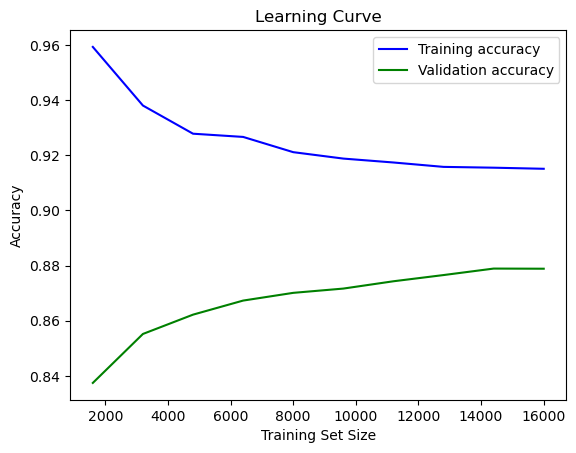

In [11]:
# TASK 7: Learning Curve Analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Moyenne des scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graphique
plt.plot(train_sizes, train_mean, label="Training accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Validation accuracy", color="green")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


9. Ethical Considerations and Explainability:

    Goal: Discuss the ethics in using and deploying your AI-based solution by investigating and implementing suitable explainability methods.
    
    Task: Understanding how a machine learning model makes predictions is crucial for ensuring transparency, fairness, and accountability in AI deployment. One of the widely used techniques for model explainability is SHAP (SHapley Additive exPlanations), which helps determine how much each feature (word) contributes to a prediction.
    In this task, you will use SHAP to analyze the impact of individual words on sentiment classification. This will allow you to visualize which words increase or decrease the probability of a positive or negative sentiment prediction. Additionally, discuss key aspects such as potential biases in the model, fairness in outcomes, and accountability in AI decision-making. You can find more information here: https://shap.readthedocs.io/en/latest/generated/shap.Explanation.html

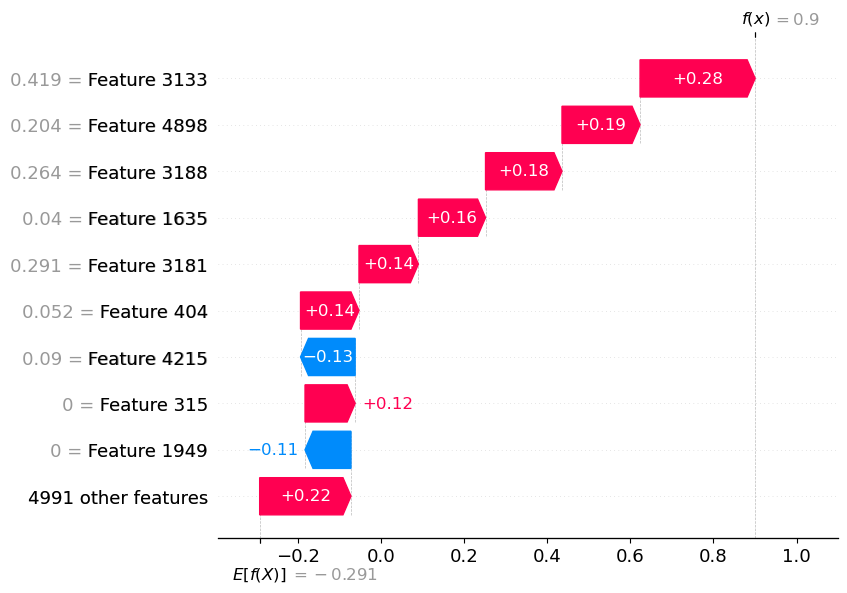

In [15]:
# TASK 9: Ethical Considerations & Explainability

# Show SHAP summary plot with proper feature names

import shap

# Initialisation de l'explicateur SHAP
explainer = shap.Explainer(best_model, X_test)

# Analyse d'une seule critique (première de X_test)
shap_values = explainer(X_test[0])

# Affichage du graphique waterfall correctement indexé
shap.waterfall_plot(shap_values[0])  # Correction ici



10. Deployment Considerations for Embedded Systems:

    Goal: Optimize and convert the trained logistic regression model for deployment on embedded systems like Arduino
    
    Task: To deploy the trained logistic regression model on a resource-constrained embedded system like an Arduino, we must optimize and convert the model into a format suitable for execution in an environment with limited memory and processing power. Since embedded systems do not support direct execution of machine learning models trained in Python, we extract the model’s learned parameters—namely, the weights and bias—after training. These parameters are then quantized to fixed-point integers to eliminate the need for floating-point calculations, which are inefficient on microcontrollers.
    Once quantization is applied, we generate a C++ .h header file containing the model’s coefficients and bias, formatted in a way that allows direct use within an Arduino sketch. The final model is optimized to perform inference using integer arithmetic, making it both lightweight and efficient for deployment on microcontrollers. You can find more information here: https://medium.com/@thommaskevin/tinyml-binomial-logistic-regression-0fdbf00e6765

In [16]:
# TASK 10: Deployment Considerations (Model Quantization & Export for Arduino)
# Extract weights and bias from the trained logistic regression model

# Apply quantization (convert to fixed-point representation)

# Generate C++ header file for Arduino

# Save the header file
#################################################

# Extraire les poids et biais du modèle LogisticRegression
weights = best_model.coef_[0]  # Poids du modèle
bias = best_model.intercept_[0]  # Biais du modèle

# Affichage des premières valeurs pour vérification
print(f"Premiers poids : {weights[:10]}")
print(f"Biais : {bias}")

# Facteur d'échelle pour convertir en entiers (évite l'utilisation de float sur Arduino)
scaling_factor = 1000

# Conversion des poids en entiers (quantification)
quantized_weights = (weights * scaling_factor).astype(int)
quantized_bias = int(bias * scaling_factor)

# Vérification des valeurs après conversion
print(f"Poids quantifiés : {quantized_weights[:10]}")
print(f"Biais quantifié : {quantized_bias}")

# Génération du fichier C++ contenant les paramètres du modèle
cpp_code = f"""
#ifndef SENTIMENT_MODEL_H
#define SENTIMENT_MODEL_H

const int weights[{len(quantized_weights)}] = {{ {', '.join(map(str, quantized_weights))} }};
const int bias = {quantized_bias};

#endif // SENTIMENT_MODEL_H
"""

# Sauvegarde du fichier en tant que "sentiment_model.h"
with open("sentiment_model.h", "w") as f:
    f.write(cpp_code)

print("✅ Fichier 'sentiment_model.h' généré avec succès !")


Premiers poids : [-0.19827358  0.49216725 -0.51945277  0.82642173 -0.57162624  0.22431873
 -0.44598847 -0.17014009  0.05812225  0.385476  ]
Biais : 0.09604436607263504
Poids quantifiés : [-198  492 -519  826 -571  224 -445 -170   58  385]
Biais quantifié : 96
✅ Fichier 'sentiment_model.h' généré avec succès !
